In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense

Using TensorFlow backend.


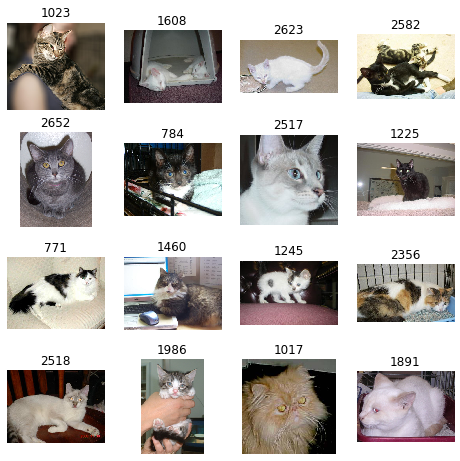

In [2]:
# generate axes
fig, axes = plt.subplots(4, 4, figsize = (8, 8))
# generate list of random integers (cat image 666 is corrupted)
random_list = random.sample(range(667, 3200), 16)
# convert list to numpy array and reshape
random_list = np.asarray(random_list).reshape(4, 4)

# for each row...
for i in np.arange(4):
    # for each column...
    for j in np.arange(4):
        # get sample number from list
        sample = random_list[i, j]
        # convert sample number to string so that it can be added to the file path
        sample = str(sample)
        # generate file path
        name = r'C:\Users\marti\OneDrive\Documents\Python\Machine Learning\Jupyter\PetImages\Train\Cat'+'\\'+sample+'.jpg'
        # use imread function to read image from file path into an array
        image = plt.imread(name)
        # plot array as image using imshow
        axes[i, j].imshow(image)
        # remove axis
        axes[i, j].axis('off')
        # set title
        axes[i, j].set_title(sample)
        
plt.show()


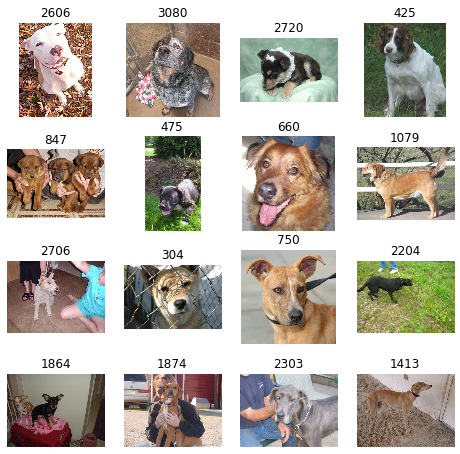

In [3]:
# generate axes
fig, axes = plt.subplots(4, 4, figsize = (8, 8))
# generate list of random integers
random_list = random.sample(range(0, 3200), 16)
# convert list to numpy array and reshape
random_list = np.asarray(random_list).reshape(4, 4)

# for each row...
for i in np.arange(4):
    # for each column...
    for j in np.arange(4):
        # get sample number from list
        sample = random_list[i, j]
        # convert sample number to string so that it can be added to the file path
        sample = str(sample)
        # generate file path
        name = r'C:\Users\marti\OneDrive\Documents\Python\Machine Learning\Jupyter\PetImages\Train\Dog'+'\\'+sample+'.jpg'
        # use imread function to read image from file path into an array
        image = plt.imread(name)
        # plot array as image using imshow
        axes[i, j].imshow(image)
        # remove axis
        axes[i, j].axis('off')
        # set title
        axes[i, j].set_title(sample)
    
plt.show()

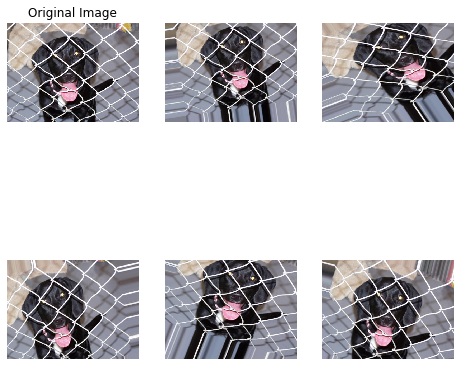

In [4]:
# create instance of ImageDataGenerator to perform image augmentation
# the first 5 auguments specify the 5 image augmentations which will take place
image_generator = ImageDataGenerator(rotation_range = 30, width_shift_range = 0.2, height_shift_range = 0.2, zoom_range = 0.2,
                                    horizontal_flip = True, fill_mode = 'nearest')
# create a list to store images
all_images = []
# generate random integer
sample = random.randint(1, 3200)
# convert to string
sample = str(sample)
# get file path of randomly chosen image
name = r'C:\Users\marti\OneDrive\Documents\Python\Machine Learning\Jupyter\PetImages\Train\Dog'+'\\'+sample+'.jpg'
# use imread function to read image from file path into an array
image = plt.imread(name)
# add images to list
all_images.append(image)
# numpy array must be of rank 4 for use with ImageDataGenerator.flow()
image = image.reshape((1,) + image.shape)
# generate batch of augmented images
sample_augmented_images = image_generator.flow(image)

# we will be generating 5 augmented images
for i in range(5):
    # get augmented image from generator
    augmented_images = sample_augmented_images.next()
    # add augmented image to list
    for image in augmented_images:
        all_images.append(image.astype('uint8'))

# generate axes        
fig, axes = plt.subplots(2, 3, figsize = (8, 8))
# for each row of three axes
for i in np.arange(3):
    axes[0, i].imshow(all_images[i])
    axes[1, i].imshow(all_images[i + 3])
    # remove axis
    axes[0, i].axis('off')
    axes[1, i].axis('off')
    # set title of original image
    axes[0, 0].set_title('Original Image')
    
plt.show()


In [5]:
# define number of kernels
num_kernels = 32
# define kernel size
kernel_size = 3
# define Max Pooling layer size
maxpooling_size = 2

# generate a sequential model
model = Sequential()
# add the first convolutional layer
# the input shape refers to the pixels that each image will be compressed or expanded to before it is input into
# the model
model.add(Conv2D(num_kernels, (kernel_size, kernel_size), input_shape = (32, 32, 3), activation = 'relu'))
# add the first Max Pooling layer
model.add(MaxPooling2D(pool_size = (maxpooling_size, maxpooling_size)))
# add the second convolutional layer
model.add(Conv2D(num_kernels, (kernel_size, kernel_size), input_shape = (32, 32, 3), activation = 'relu'))
# add the second Max Pooling layer
model.add(MaxPooling2D(pool_size = (maxpooling_size, maxpooling_size)))
# flatten the multidimensional output into a single-dimensional array
model.add(Flatten())
# add a fully-connected layer with 128 neurons
model.add(Dense(units = 128, activation = 'relu'))
# add a dropout layer with 50% of the weights equal to zero
model.add(Dropout(0.5))
# add the output layer
# only a single neuron using the sigmoid activation is required for our binary classification problem
model.add(Dense(units = 1, activation = 'sigmoid'))
# compile the model
# the adam optimiser is based on a type of stochastic gradient descent
# we will use the binary cross-entropy cost function since this is a binary classification task
# the model performance will be evaluated via its accuracy
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [6]:
# instantiate an image generator
# rescale so that all array elements (from the image pxiels) have a value between 0 and 1
training_data_generator = ImageDataGenerator(rescale = 1/255)
# generate batches of training data from directory path
# batch size defines the number of samples used in a mini batch
# target size is equivalent to input size
training_set = training_data_generator.flow_from_directory(r'C:\Users\marti\OneDrive\Documents\Python\Machine Learning\Jupyter\PetImages\Train', target_size = (32, 32), batch_size = 16, class_mode = 'binary')
# steps per epoch defines how many batches we will use per epoch
# an epoch refers to a complete cycle of the data through the neural network, i.e., forward propagation and backpropagation
model.fit_generator(training_set, steps_per_epoch = 6400/16, epochs = 10, verbose = 1)

Found 6399 images belonging to 2 classes.
Epoch 1/10
400/400 [==============================] - 176s 439ms/step - loss: 0.6736 - accuracy: 0.5796
Epoch 2/10
400/400 [==============================] - 55s 137ms/step - loss: 0.6278 - accuracy: 0.6510
Epoch 3/10
400/400 [==============================] - 54s 134ms/step - loss: 0.5767 - accuracy: 0.6965
Epoch 4/10
400/400 [==============================] - 60s 150ms/step - loss: 0.5336 - accuracy: 0.7289
Epoch 5/10
400/400 [==============================] - 59s 148ms/step - loss: 0.5001 - accuracy: 0.7542
Epoch 6/10
400/400 [==============================] - 60s 149ms/step - loss: 0.4684 - accuracy: 0.7787
Epoch 7/10
400/400 [==============================] - 59s 147ms/step - loss: 0.4436 - accuracy: 0.7900
Epoch 8/10
400/400 [==============================] - 58s 146ms/step - loss: 0.4120 - accuracy: 0.8090
Epoch 9/10
400/400 [==============================] - 60s 151ms/step - loss: 0.3764 - accuracy: 0.8345
Epoch 10/10
400/400 [=========

In [7]:
# instantiate an image generator for the test set
testing_data_generator = ImageDataGenerator(rescale = 1/255)
# generate batches of testing data from directory path
test_set = testing_data_generator.flow_from_directory(r'C:\Users\marti\OneDrive\Documents\Python\Machine Learning\Jupyter\PetImages\Test', target_size = (32, 32), batch_size = 16, class_mode = 'binary')
# calculate the cost function and accuracy for the test set
# steps defines the number of batches evaluated before stopping
# steps = number of test images / batch size = 1600 /16 = len(test_set)
score = model.evaluate_generator(test_set, steps = len(test_set))

# print out results on test set
for i, metric in enumerate(model.metrics_names):
    print('{}: {:.2f}'.format(metric, score[i]))

Found 1600 images belonging to 2 classes.
loss: 0.50
accuracy: 0.74


In [25]:
test_set2 = testing_data_generator.flow_from_directory(r'C:\Users\marti\OneDrive\Documents\Python\Machine Learning\Jupyter\PetImages\Test', target_size = (32, 32), batch_size = 1, class_mode = 'binary')

strong_wrong = []
strong_correct = []
weak_wrong = []

# for each image in the test set...
for i in range(len(test_set2)):
    # get image array from test_set2 data generator
    # __getitem__(i) retrieves the i-th item from test_set2, it acts like test_set2[i]
    image = test_set2.__getitem__(i)[0]
    # use model to predict classification:
    # > 0.5 is a dog (class 1), < 0.5 is a cat (class 0) 
    pred_prob = model.predict(image)[0][0]
    # int(True) = 1, int(False) = 0
    pred_label = int(pred_prob > 0.5)
    # get actual label of image
    actual_label = int(test_set2.__getitem__(i)[1][0])
    # if the predicted and actual labels do not agree and the confidence in the predicition is high
    # add the index to the strong_wrong list
    if pred_label != actual_label and (pred_prob > 0.8 or pred_prob < 0.2):
        strong_wrong.append(i)
    # if the predicted and actual labels do not agree and the confidence in the prediciton is low
    # add the index to the weak_wrong list
    elif pred_label != actual_label and (pred_prob > 0.4 and pred_prob < 0.6):
        weak_wrong.append(i)
    # if the predicted and actual labels match and the confidence in the prediciton is high
    # add the index to the strong_correct list
    elif pred_label == actual_label and (pred_prob > 0.8 or pred_prob < 0.2):
        strong_correct.append(i)
    # stop once we have at least nine image indexes in each list
    if (len(strong_wrong) >= 9 and len(weak_wrong) >=9 and len(strong_correct) >= 9):
        break


Found 1600 images belonging to 2 classes.


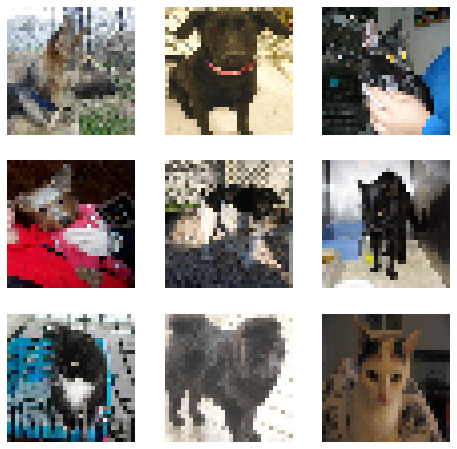

In [27]:
# generate axes
fig, axes = plt.subplots(3, 3, figsize = (8, 8))
# for 9 random image indexes in the list...
for i, index in enumerate(random.sample(strong_wrong, 9)):
    # get the image array for the index
    image = test_set2.__getitem__(index)[0].reshape(32, 32, 3)
    # plot images on the axes
    if i <= 2:
        axes[0, i].imshow(image)
        axes[0, i].axis('off')
    elif 3 <= i <= 5:
        axes[1, i - 3].imshow(image)
        axes[1, i - 3].axis('off')
    else:
        axes[2, i - 6].imshow(image)
        axes[2, i - 6].axis('off')
    
plt.show()

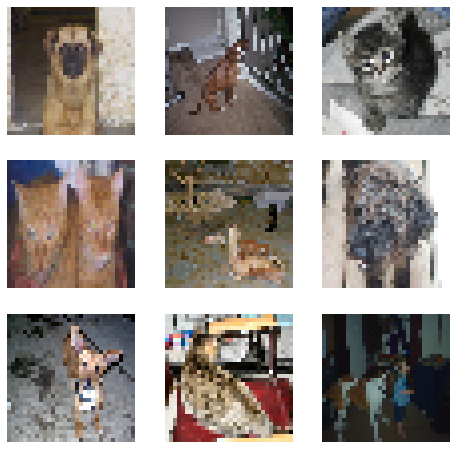

In [31]:
# generate axes
fig, axes = plt.subplots(3, 3, figsize = (8, 8))
# for 9 random image indexes in the list...
for i, index in enumerate(random.sample(weak_wrong, 9)):
    # get the image array for the index
    image = test_set2.__getitem__(index)[0].reshape(32, 32, 3)
    # plot images on the axes
    if i <= 2:
        axes[0, i].imshow(image)
        axes[0, i].axis('off')
    elif 3 <= i <= 5:
        axes[1, i - 3].imshow(image)
        axes[1, i - 3].axis('off')
    else:
        axes[2, i - 6].imshow(image)
        axes[2, i - 6].axis('off')
    
plt.show()

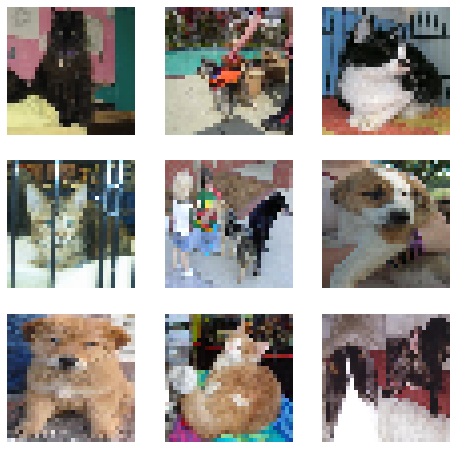

In [34]:
# generate axes
fig, axes = plt.subplots(3, 3, figsize = (8, 8))
# for 9 random image indexes in the list...
for i, index in enumerate(random.sample(strong_correct, 9)):
    # get the image array for the index
    image = test_set2.__getitem__(index)[0].reshape(32, 32, 3)
    # plot images on the axes
    if i <= 2:
        axes[0, i].imshow(image)
        axes[0, i].axis('off')
    elif 3 <= i <= 5:
        axes[1, i - 3].imshow(image)
        axes[1, i - 3].axis('off')
    else:
        axes[2, i - 6].imshow(image)
        axes[2, i - 6].axis('off')
    
plt.show()